In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing(use_unicode=True)


eps1 = Symbol ('varepsilon_1')
eps2 = Symbol ('varepsilon_2')
mu1 = Symbol ('mu_1')
mu2 = Symbol ('mu_2')

mux = Symbol ('mu_x')
muy = Symbol ('mu_y')
muz = Symbol ('mu_z')
mu = (mux**2+muy**2+muz**2)**(1/2)

s = Symbol('s')
sz = (1-s**2)**(1/2)

k0 = Symbol ('k_0')
k1 = (eps1)**(1/2)*k0
k2 = (eps2)**(1/2)*k0
kz1 = k1*sz
kz2 = k2*(1-(eps1/eps2)*(1-sz**2))**(1/2)

z0= Symbol('z_0')

rp = (eps2*kz1-eps1*kz2)/(eps2*kz1+eps1*kz2)
rs = (mu2*kz1-mu1*kz2)/(mu2*kz1+mu1*kz2)
tp = 2*eps2*kz1/(eps2*kz1+eps1*kz2)*((mu2*eps1)/(mu1*eps2))**(1/2)
ts = 2*mu2*kz1/(mu2*kz1+mu1*kz2)

# rp = rs = 1 
# tp =ts =0

# for the integral
## up
f1_u = s*sz*(abs(rp)**2) +s/sz*(abs(rs)**2)
f2_u = (s*sz*rp-s/sz*rs)*exp(2*I*k1*z0*sz)
f3_u = s**3/sz*(abs(rp)**2)
f4_u = s**3/sz*rp*exp(2*I*k1*z0*sz)
## down
f1_d = s*(1-eps1/eps2*s**2)**(1/2)*(abs(tp)**2+abs(ts)**2*(1-s**2)**(-1))
f2_d = s**3*(1-eps1/eps2*s**2)**(1/2)*(abs(tp)**2*(1-s**2)**(-1))
f3_d = s*(1-eps1/eps2*s**2)**(1/2)*(abs(tp)**2+abs(ts)**2*(s**2-1)**(-1))*exp(-2*k1*z0*(s**2-1)**(1/2))
f4_d = s**3*(1-eps1/eps2*s**2)**(1/2)*(abs(tp)**2*(s**2-1)**(-1))*exp(-2*k1*z0*(s**2-1)**(1/2))

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cos', 'f', 'sin', 'cosh', 'interactive', 'gamma', 'sqrt', 'plotting', 'source', 'ones', 'product', 'seterr', 'diag', 'tan', 'Circle', 'sign', 'test', 'det', 'mod', 'beta', 'take', 'binomial', 'multinomial', 'transpose', 'sinh', 'poly', 'var', 'invert', 'floor', 'deprecated', 'vectorize', 'add', 'sinc', 'exp', 'eye', 'solve', 'diff', 'reshape', 'Polygon', 'zeros', 'power', 'trace', 'roots', 'prod', 'pi', 'tanh', 'log', 'trunc', 'flatten', 'cbrt', 'plot', 'conjugate', 'nan']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


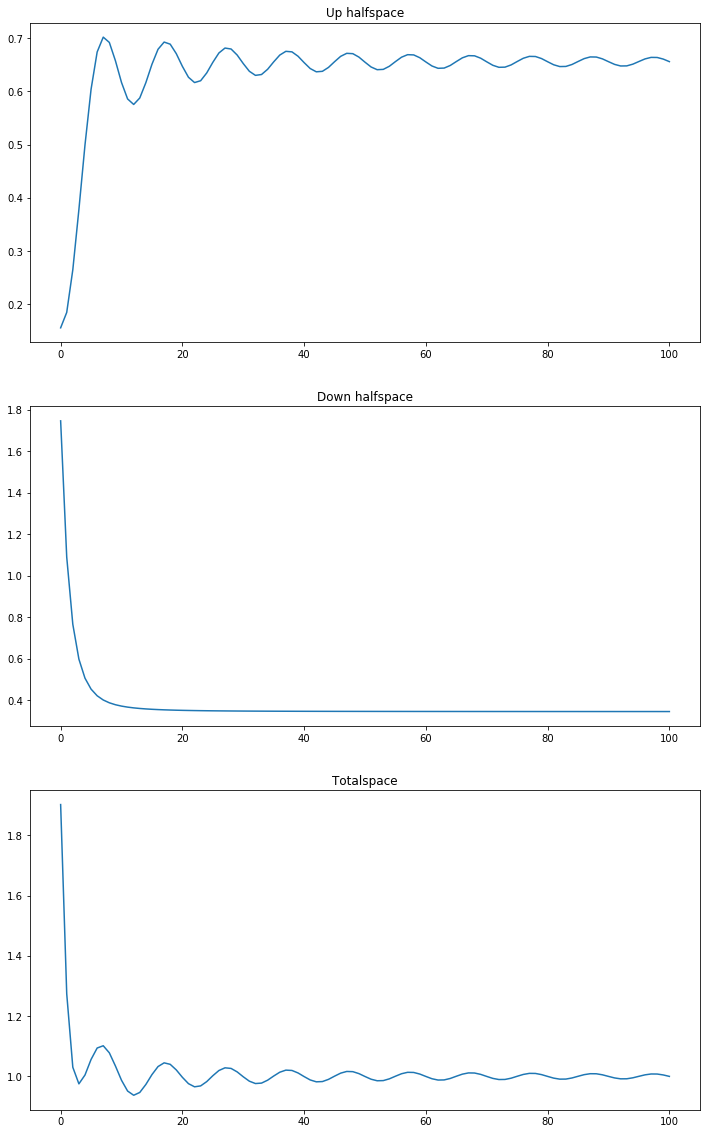

In [40]:
from scipy import integrate
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 20)
eps_1 = 1
eps_2 = 4

mu_1 = 1
mu_2 = 1

mu_x = 0
mu_y = 1
mu_z = 0
mu_ = (mu_x**2+mu_y**2+mu_z**2)**(1/2)

lam = 100
P_up= np.zeros(lam+1)
P_down= np.zeros(lam+1)
k_0 = 10*np.pi/lam

#up halfspace
i1_u = lambdify((s, eps1,eps2,mu1,mu2,z0,k0), f1_u, "numpy")
i2_u = lambdify((s, eps1,eps2,mu1,mu2,z0,k0), f2_u, "numpy")
i3_u = lambdify((s, eps1,eps2,mu1,mu2,z0,k0), f3_u, "numpy")
i4_u = lambdify((s, eps1,eps2,mu1,mu2,z0,k0), f4_u, "numpy")

#down halfspace
i1_d = lambdify((s, eps1,eps2,mu1,mu2), f1_d, "numpy")
i2_d = lambdify((s, eps1,eps2,mu1,mu2), f2_d, "numpy")
i3_d = lambdify((s, eps1,eps2,mu1,mu2,z0,k0), f3_d, "numpy")
i4_d = lambdify((s, eps1,eps2,mu1,mu2,z0,k0), f4_d, "numpy")

#down half space allowed
I1_d_ = lambda s: i1_d(s,eps_1,eps_2,mu_1,mu_2)
I2_d_ = lambda s: i2_d(s,eps_1,eps_2,mu_1,mu_2)
I1_d = integrate.quad(I1_d_, 0, 1)[0]
I2_d = integrate.quad(I2_d_, 0, 1)[0]
P_down_a = 3/8*(mu_x**2+mu_y**2)/mu_**2*(eps_2/eps_1)**(1/2)*I1_d+3/4*(mu_z**2)/mu_**2*(eps_2/eps_1)**(1/2)*I2_d

for z_0 in range(lam+1):
    #up halfspce
    I1_u_ = lambda s: i1_u(s,eps_1,eps_2,mu_1,mu_2,z_0,k_0)
    I2_u_ = lambda s: np.real(i2_u(s,eps_1,eps_2,mu_1,mu_2,z_0,k_0))
    I3_u_ = lambda s: i3_u(s,eps_1,eps_2,mu_1,mu_2,z_0,k_0)
    I4_u_ = lambda s: np.real(i4_u(s,eps_1,eps_2,mu_1,mu_2,z_0,k_0))
    I1_u = integrate.quad(I1_u_, 0, 1)[0]
    I2_u = integrate.quad(I2_u_, 0, 1)[0]
    I3_u = integrate.quad(I3_u_, 0, 1)[0]
    I4_u = integrate.quad(I4_u_, 0, 1)[0]

    #down halfspace forbiden
    I3_d_ = lambda s: i3_d(s,eps_1,eps_2,mu_1,mu_2,z_0,k_0)
    I4_d_ = lambda s: np.real(i4_d(s,eps_1,eps_2,mu_1,mu_2,z_0,k_0))
    I3_d = integrate.quad(I3_d_, 1, (eps_2/eps_1)**(1/2))[0]
    I4_d = integrate.quad(I4_d_, 1, (eps_2/eps_1)**(1/2))[0]
    
    P_up[z_0] = (mu_x**2+mu_y**2)/mu_**2*(1/2 +3/8*I1_u-3/4*I2_u)+(mu_z**2)/mu_**2*(1/2+3/4*I3_u+3/2*I4_u)
    P_down[z_0] = 3/8*(mu_x**2+mu_y**2)/mu_**2*(eps_2/eps_1)**(1/2)*I3_d+3/4*(mu_z**2)/mu_**2*(eps_2/eps_1)**(1/2)*I4_d + P_down_a
P_total = P_up + P_down    
z_0 = np.arange(lam+1)
f, ax = plt.subplots(3, 1)
ax[0].set_title("Up halfspace")
ax[1].set_title("Down halfspace")
ax[2].set_title("Totalspace")
ax[0].plot(z_0,P_up)
ax[1].plot(z_0,P_down)
ax[2].plot(z_0,P_total)
plt.show()